In [17]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### Loading Text File into Pandas DataFrame

In [32]:
df = pd.read_csv("Test_v1.txt", delimiter='\t')

In [33]:
df.head()

,TrainSen,1,I loovee when people text back ... 😒 #sarcastictweet
0,TrainSen,1,Don't you love it when your parents are Pissed...
1,TrainSen,1,"So many useless classes , great to be student"
2,TrainSen,1,Oh how I love getting home from work at 3am an...
3,TrainSen,1,I just love having grungy ass hair 😑 #not
4,TrainSen,1,"Thank you , random guy , for sneaking up behin..."


## Reading, Renaming Columns, and Saving DataFrame to CSV

In [35]:
df = pd.read_csv('Test_v1.txt', header=None, delimiter='\t')

# name the columns
df.columns = ['Train', 'Label', 'Tweets']

print(df.head())

df.to_csv('Clean_Dataset.csv', index=False)

      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... 😒 #sarcasti...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1          I just love having grungy ass hair 😑 #not


## Drop the 'Train' column

In [36]:
if df.shape[1] == 3:
    df.columns = ['Train', 'Label', 'Tweets']

    # Drop the 'Train' column
    df = df.drop(columns=['Train'])

    df.to_csv('Clean_Dataset.csv', index=False)
else:
    print("Unexpected number of columns in the dataset. Expected 3 columns, but found:", df.shape[1])

In [37]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... 😒 #sarcasti...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair 😑 #not


## Replace emojis with text descriptions in the 'Tweets' column

In [41]:
!pip install emoji

import pandas as pd
import emoji

def replace_emojis(text):
    return emoji.demojize(text, delimiters=("", ""))

# Load the dataset
df = pd.read_csv('Clean_Dataset.csv')

# Apply the replace_emojis function to the 'Tweets' column
df['Tweets'] = df['Tweets'].apply(replace_emojis)

# Save the cleaned dataset
df.to_csv('Clean_Dataset.csv', index=False)

# Print the first few rows of the dataframe
print(df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.8 MB/s eta 0:00:00
   Label                                             Tweets
0      1  I loovee when people text back ... unamused_fa...
1      1  Don't you love it when your parents are Pissed...
2      1      So many useless classes , great to be student
3      1  Oh how I love getting home from work at 3am an...
4      1  I just love having grungy ass hair expressionl...


## Remove '#' with its following text from tweets

In [42]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove '#' with its following text from tweets
df['Tweets'] = df['Tweets'].str.replace(r'#\w+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

## Replace abbreviations with their expansions

In [43]:
# Define a dictionary of abbreviations and their expansions
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'np': 'no problem',
    'tmi': 'too much information',
    'smh': 'shake my head',
    'irl': 'in real life',
    'afk': 'away from keyboard',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'irl': 'in real life',
    'omw': 'on my way',
    'rofl': 'rolling on the floor laughing',
    'afaik': 'as far as I know',
    'gg': 'good game',
    'ggwp': 'good game, well played',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'ttyl': 'talk to you later',
    'ftw': 'for the win',
    'smh': 'shaking my head',
}

# Function to replace abbreviations with their expansions
def replace_abbreviations(text):
    for word in text.split():
        if word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])
    return text

df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].apply(replace_abbreviations)
df.to_csv('Clean_Dataset.csv', index=False)

## Removing Special Characters from Tweets and Saving to CSV

In [44]:
df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].str.replace('#', '')
df['Tweets'] = df['Tweets'].str.replace('"', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace('?', '')
df['Tweets'] = df['Tweets'].str.replace('*', '')
df['Tweets'] = df['Tweets'].str.replace('<', '')
df['Tweets'] = df['Tweets'].str.replace('...', '')
df['Tweets'] = df['Tweets'].str.replace('/', '')
df['Tweets'] = df['Tweets'].str.replace('@', '')
df['Tweets'] = df['Tweets'].str.replace('~', '')
df['Tweets'] = df['Tweets'].str.replace('!', '')
df['Tweets'] = df['Tweets'].str.replace('>', '')
df['Tweets'] = df['Tweets'].str.replace('-', '')
df['Tweets'] = df['Tweets'].str.replace(')', '')
df['Tweets'] = df['Tweets'].str.replace('(', '')
df['Tweets'] = df['Tweets'].str.replace('3', '')
df.to_csv('Clean_Dataset.csv', index=False)

## Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column

In [45]:
df = pd.read_csv('Clean_Dataset.csv')

# Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column
df['Label'] = df['Label'].replace({1: 'sarcastic', 0: 'not sarcastic'})

df.to_csv('Clean_Dataset.csv', index=False)

In [46]:
df.head()

,Label,Tweets
0,sarcastic,I loovee when people text back unamused_face
1,sarcastic,Don't you love it when your parents are Pissed...
2,sarcastic,"So many useless classes , great to be student"
3,sarcastic,Oh how I love getting home from work at am and...
4,sarcastic,I just love having grungy ass hair expressionl...


In [47]:
df.dtypes

Label     object
Tweets    object
dtype: object

## Remove URLs from the 'Tweets' column

In [50]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove URLs from the 'Tweets' column
df['Tweets'] = df['Tweets'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

## Merge two dataset

In [51]:
df1 = pd.read_csv("fd1.csv")
df2 = pd.read_csv('Clean_Dataset.csv')

df1 = df1.rename(columns={"sarcsam": "Sarcasm", "tweet": "Tweet"})
df2 = df2.rename(columns={"Label": "Sarcasm", "Tweets": "Tweet"})

df1['Sarcasm'] = df1['Sarcasm'].replace({'sarcastic': 'yes', 'non sarcastic': 'no', 'not sarcastic': 'no'})
merged_df = pd.concat([df1[['Tweet', 'Sarcasm']], df2[['Tweet', 'Sarcasm']]], ignore_index=True)

merged_df.to_csv('Merge.csv', index=False)


In [52]:
merged_df.head()

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes


## Check for Duplicated

In [53]:
df.duplicated().sum()

0

## Check for Null value

In [54]:
df.isnull().sum()

Label     0
Tweets    0
dtype: int64

## Word Tokenization

In [55]:
tokenizer = TweetTokenizer()

def tokenize_text(Tweets):
    return tokenizer.tokenize(Tweets)

df = pd.read_csv('Merge.csv')
df['tokens'] = df['Tweet'].apply(tokenize_text)

print(df.head(15))
df.to_csv('Merge.csv', index=False)

                                                Tweet Sarcasm  \
0   Fantastic service yet again from EE. 1st you u...     yes   
1   Not sure if that was or. I will take it! face_...     yes   
2          Barely 9 am and already shaking with rage.     yes   
3   I guess that proves it then. Black folks have ...     yes   
4                          Does this tweet need a tag     yes   
5   both. Wont be using you again. Made a formal c...     yes   
6                Fuuuuuuuuck this shit screams thug!!     yes   
7   66 UEs from Staniel and he wins in straights. ...     yes   
8              totally surprising to every husker fan     yes   
9                     Haha got to love the enthusiasm     yes   
10  a southern pride advocate but of course it has...     yes   
11  So nice not hearing any rumors that the  are n...     yes   
12  We should divide illegals into two lines one f...     yes   
13      does not even look like that great of a view.     yes   
14  Mondays are always dr

In [56]:
df = pd.read_csv("Small.csv", delimiter=',')

In [57]:
y = df['Sarcasm']
y.value_counts()

Sarcasm
yes    3633
no     3297
Name: count, dtype: int64

In [58]:
df

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes
...,...,...
6925,just home from uni and im knackered have no en...,no
6926,as we have been approved by god to be entruste...,no
6927,i love these boys so much and id be so gratefu...,yes
6928,if youre in ny wed love to have you speak on w...,no


In [10]:
print(df['Tweet'].dtype)

object


In [73]:
df['Sarcasm'] = df['Sarcasm'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# **GRU** (Grated Recurrent Unit)

In [74]:
df

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,1
1,Not sure if that was or. I will take it! face_...,1
2,Barely 9 am and already shaking with rage.,1
3,I guess that proves it then. Black folks have ...,1
4,Does this tweet need a tag,1
...,...,...
6925,just home from uni and im knackered have no en...,0
6926,as we have been approved by god to be entruste...,0
6927,i love these boys so much and id be so gratefu...,1
6928,if youre in ny wed love to have you speak on w...,0


In [75]:
max_len = 100
vocab_size = 10000
embedding_dim = 128

# Prepare the text data
texts = df['Tweet']
labels = df['Sarcasm']

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [76]:
# Split the dataset into Train, Test, and Validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [77]:
# Calculate sizes
train_size = len(X_train)
test_size = len(X_test)
val_size = len(X_val)
sizes = [train_size, test_size, val_size]
dataset_labels = ['Train', 'Test', 'Validation']

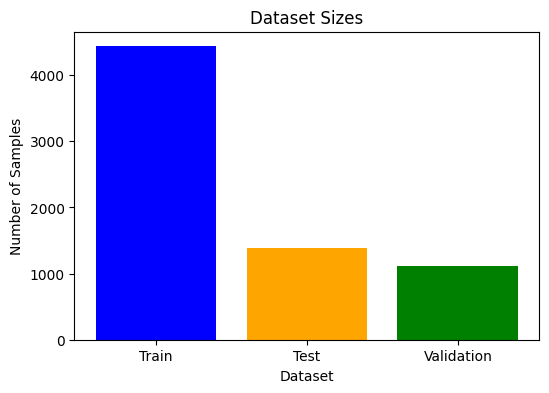

In [78]:
# Plot Dataset sizes
plt.figure(figsize=(6, 4))
plt.bar(dataset_labels, sizes, color=['blue', 'orange', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Dataset Sizes')
plt.show()

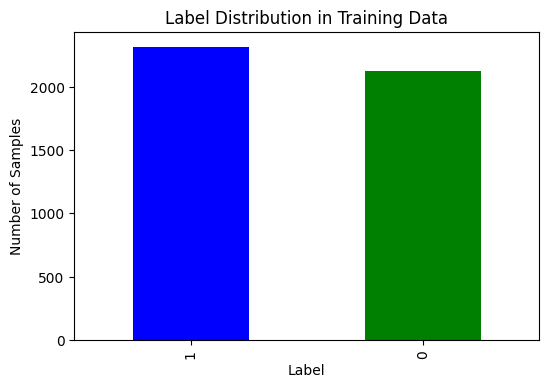

In [79]:
# Data Visualization - Label-wise Split in Train Data
label_counts = pd.Series(y_train).value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Label Distribution in Training Data')
plt.show()

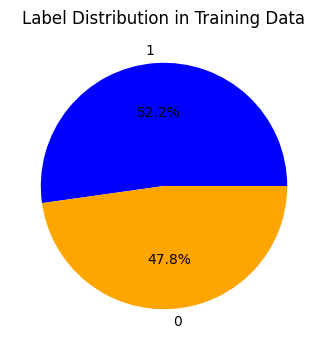

In [80]:
# Plot Label distribution (Pie Chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('')
plt.title('Label Distribution in Training Data')
plt.show()

In [14]:
# Define the GRU model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GRU(294, return_sequences=True))
model.add(GRU(254, return_sequences=True))
model.add(Dense(102, activation='relu'))
model.add(GRU(194, return_sequences=True))
model.add(GRU(194))
model.add(Dense(192, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(152, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

new_text = "This new restaurant is a real gem, NOT."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

Epoch 1/10
87/87 [==============================] - 18s 107ms/step - loss: 0.4342 - accuracy: 0.8092 - val_loss: 0.2721 - val_accuracy: 0.8874
Epoch 2/10
87/87 [==============================] - 6s 70ms/step - loss: 0.2120 - accuracy: 0.9192 - val_loss: 0.2406 - val_accuracy: 0.9019
Epoch 3/10
87/87 [==============================] - 4s 46ms/step - loss: 0.1019 - accuracy: 0.9639 - val_loss: 0.2954 - val_accuracy: 0.8947
Epoch 4/10
87/87 [==============================] - 4s 52ms/step - loss: 0.0609 - accuracy: 0.9791 - val_loss: 0.3792 - val_accuracy: 0.8882
Epoch 5/10
44/44 [==============================] - 0s 10ms/step - loss: 0.2406 - accuracy: 0.9019
Test Loss: 0.2406, Accuracy: 0.9019
44/44 [==============================] - 1s 9ms/step
F1 Score (weighted): 0.9018
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       648
           1       0.90      0.92      0.91       738

    accuracy                   

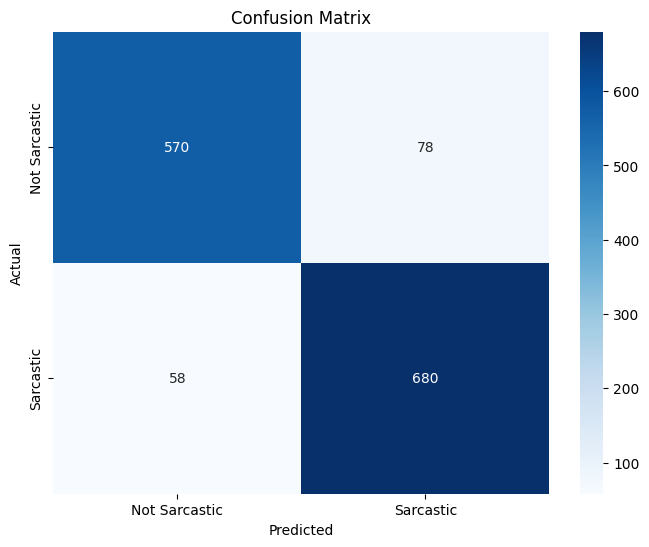

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
new_text = "Can i also came with you"
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 36ms/step
This text is predicted to be non-sarcastic.


In [21]:
new_text = "Meet my friends"
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 44ms/step
This text is predicted to be non-sarcastic.


In [22]:
new_text = "i love being annoyed"
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 37ms/step
This text is predicted to be sarcastic.


In [23]:
new_text = "I am busy right now, can I ignore you some other time?"
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 35ms/step
This text is predicted to be sarcastic.


In [24]:
new_text = "Find your patience before I lose mine."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 36ms/step
This text is predicted to be non-sarcastic.


In [25]:
new_text = "Congratulations on your promotion."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 36ms/step
This text is predicted to be non-sarcastic.


In [26]:
new_text = "The weather is beautiful today."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 41ms/step
This text is predicted to be non-sarcastic.


In [27]:
new_text = "Great job! You’ve managed to make things worse than before."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 41ms/step
This text is predicted to be sarcastic.


In [28]:
new_text = "Just what I needed, more rain on my only day off."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 39ms/step
This text is predicted to be sarcastic.


In [29]:
new_text = "My name is Divya."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 0s 38ms/step
This text is predicted to be non-sarcastic.


# Save the trained model

In [30]:
model.save('sarcasm_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
from keras.models import load_model

# Load the saved model
model = load_model('sarcasm_detection_model.h5')

# Now you can use the model to make predictions
new_text = "This new restaurant is a real gem, NOT."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

1/1 [==============================] - 3s 3s/step
This text is predicted to be sarcastic.


# Conclusion

#### Firstly Loaded the dataset

#### Preprosessed the dataset

#### Merged two dataset

#### Applied Word Tokenization to the 'Tweet' column of our dataset

#### Trained and Evaluate the Model:
####       We explored different DL Models and found GRU to have the best accuracy - 88.38%.

#### And then checked the Model for differnt tweets.